Using a small dataset on Kyphosis, I will create a decision trees and random foresets to predict whether or not the corrective spine surgery was successful.

In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [4]:
df= pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


Kyphosis is a spinal condition that requires surgery.
Column descriptions: under Kyphosis, we have values that tell us if the condition was present or absent after the operation. 
Age in months is the nect columns.
Number is the number of vertebra involved in the operation.
Start is the number of the first or top-most vertebra operated on.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [6]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


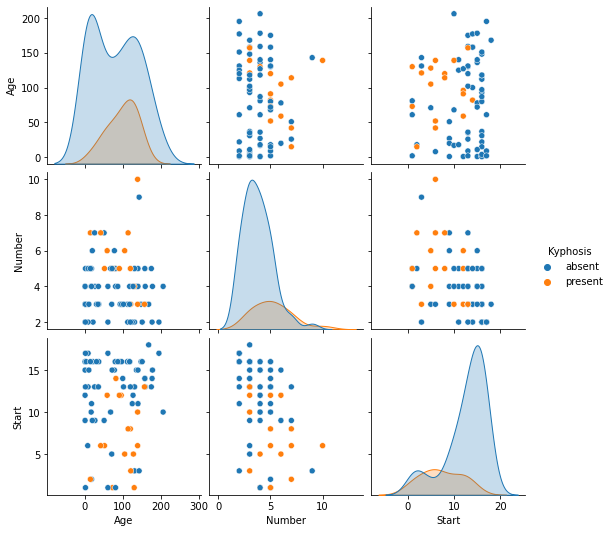

In [8]:
sns.pairplot(df, hue='Kyphosis')

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dtree = DecisionTreeClassifier()

In [14]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
pred = dtree.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[13  5]
 [ 4  3]]
              precision    recall  f1-score   support

      absent       0.76      0.72      0.74        18
     present       0.38      0.43      0.40         7

    accuracy                           0.64        25
   macro avg       0.57      0.58      0.57        25
weighted avg       0.66      0.64      0.65        25



In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rfc = RandomForestClassifier(n_estimators=200)

In [21]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [23]:
rfc_pred = rfc.predict(X_test)

In [24]:
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))

[[17  1]
 [ 5  2]]
              precision    recall  f1-score   support

      absent       0.77      0.94      0.85        18
     present       0.67      0.29      0.40         7

    accuracy                           0.76        25
   macro avg       0.72      0.62      0.62        25
weighted avg       0.74      0.76      0.72        25



A bit better but still pretty low accuracy, precision, and recall.
A reason for this could be that it's very small dataset and the train test split might have been unideal. The second potential issue is the heavy imbalance of labeled data, as I will demonstrate better in the next cell. But basically there are far more data points lebeled 'absent' than 'present' which combined with the small dataset and random state might have given us low valued metrics.

In [33]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

In [34]:
absent = df['Kyphosis'].value_counts()[0]
absent/sum(df['Kyphosis'].value_counts())

0.7901234567901234

So 79% of our data is labeled 'absent' which is a very poorly balanced dataset.
But at the very least it looks like the random forests certainly performed better than a single decision tree and I am looking forward to applying this to larger, more complex datasets.

Below I will show two different ways to plot our decision trees, so we have a little more visualization on the mathmatics.

In [36]:
from IPython.display import Image  
from io import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

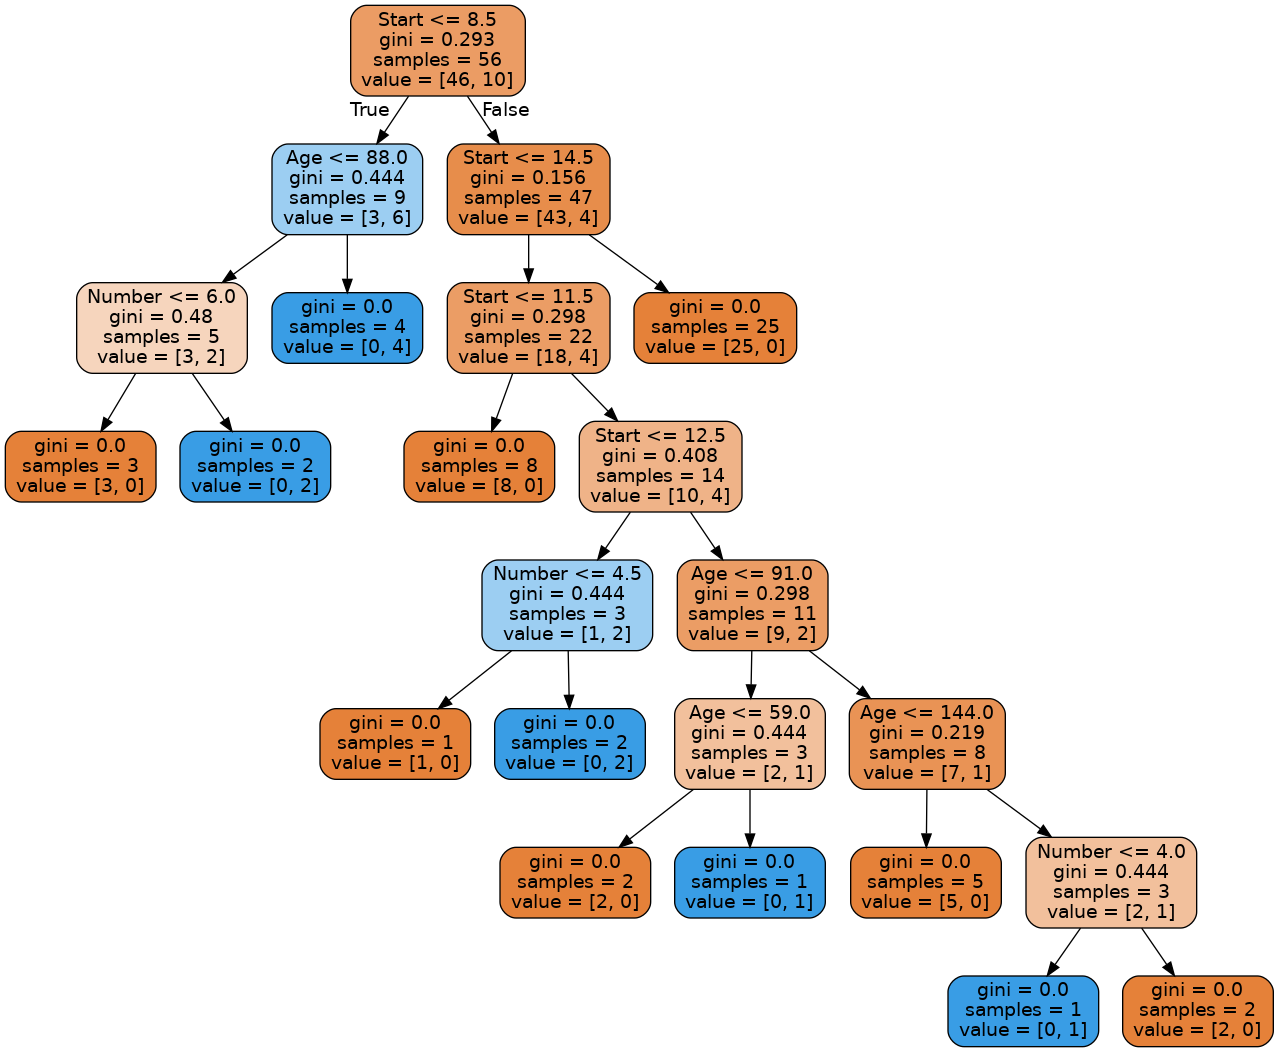

In [48]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

In [39]:
from sklearn import tree

[Text(577.2413793103449, 1019.25, 'X[2] <= 8.5\ngini = 0.293\nsamples = 56\nvalue = [46, 10]'),
 Text(346.3448275862069, 883.35, 'X[0] <= 88.0\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(230.89655172413794, 747.45, 'X[1] <= 6.0\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(115.44827586206897, 611.55, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(346.3448275862069, 611.55, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(461.7931034482759, 747.45, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(808.1379310344828, 883.35, 'X[2] <= 14.5\ngini = 0.156\nsamples = 47\nvalue = [43, 4]'),
 Text(692.6896551724138, 747.45, 'X[2] <= 11.5\ngini = 0.298\nsamples = 22\nvalue = [18, 4]'),
 Text(577.2413793103449, 611.55, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(808.1379310344828, 611.55, 'X[2] <= 12.5\ngini = 0.408\nsamples = 14\nvalue = [10, 4]'),
 Text(519.5172413793103, 475.65, 'X[1] <= 4.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(404.0689655172414, 339.75, 

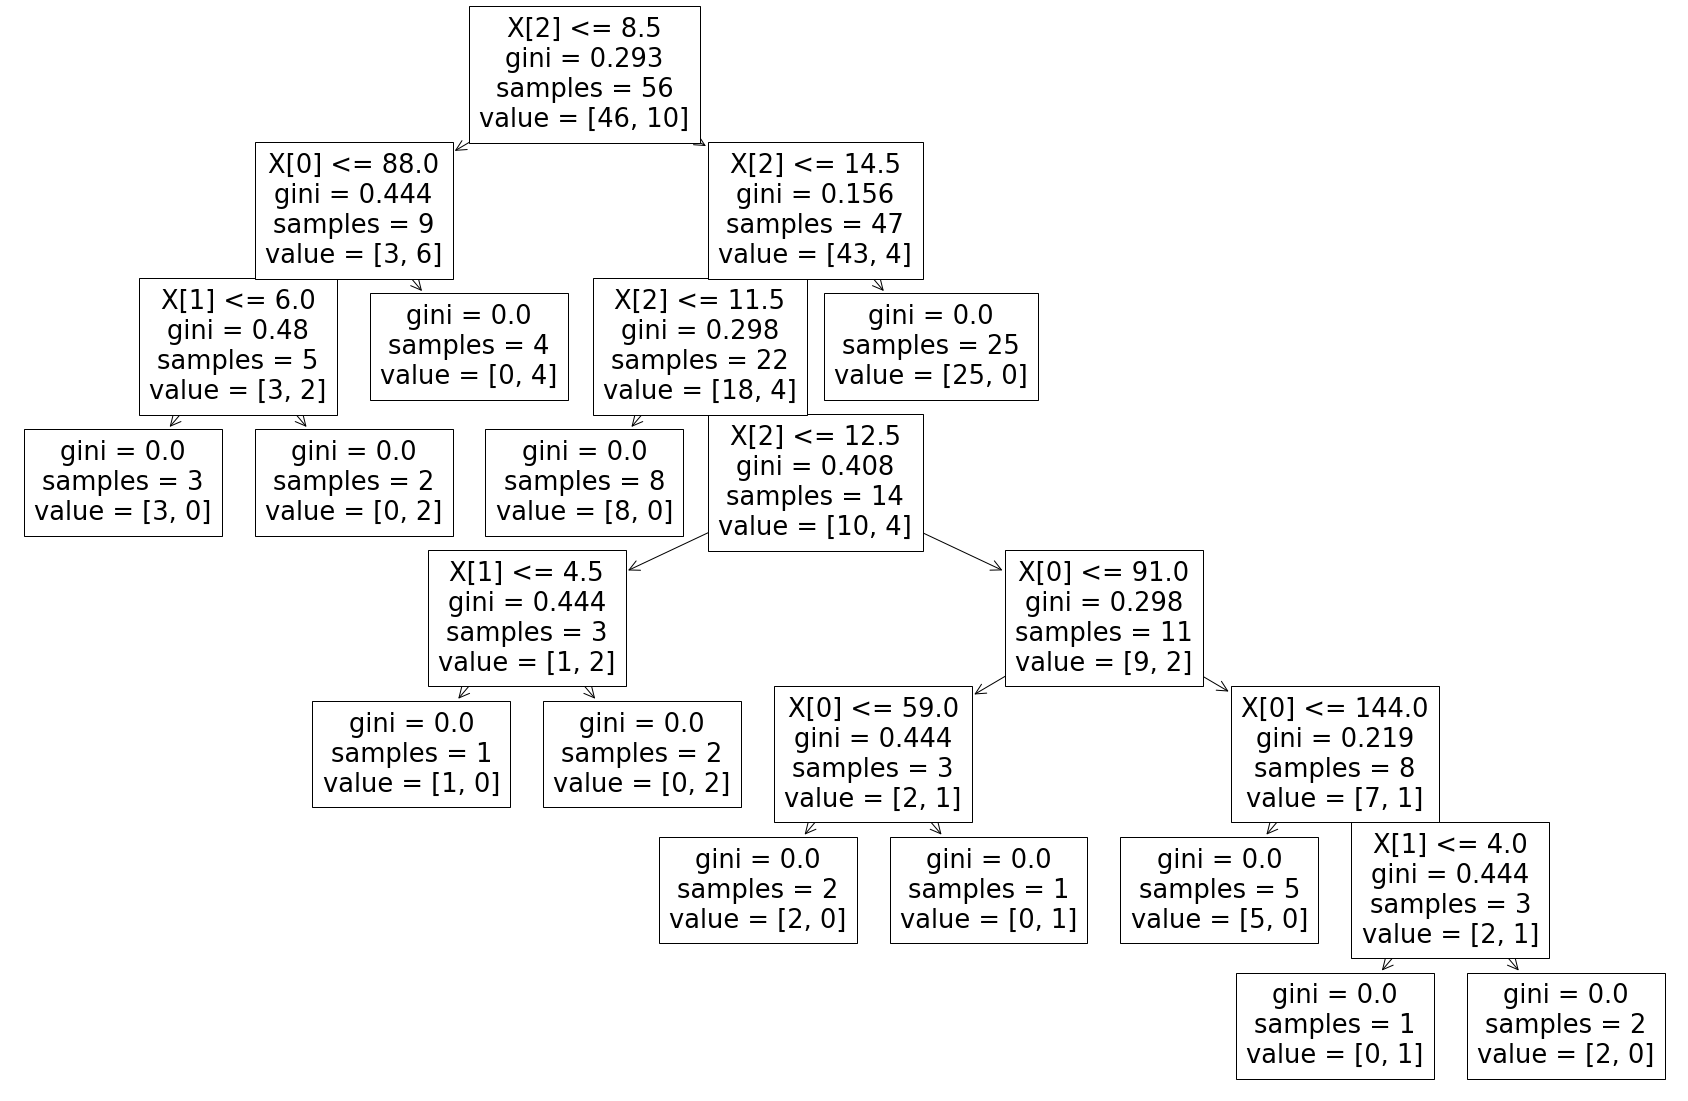

In [47]:
plt.figure(figsize=(30,20))
tree.plot_tree(dtree)